In [1]:
using VREPRobot

┌ Info: Precompiling VREPRobot [c59bc619-5862-40df-b560-9e5a8bb318e1]
└ @ Base loading.jl:1242
┌ Info: Skipping precompilation since __precompile__(false). Importing VREPRobot [c59bc619-5862-40df-b560-9e5a8bb318e1].
└ @ Base loading.jl:1017


In [2]:
robot = Robot()

Connected to remoteApi server.
Pioneer_p3dx_ultrasonicSensor1 connected.
Pioneer_p3dx_ultrasonicSensor2 connected.
Pioneer_p3dx_ultrasonicSensor3 connected.
Pioneer_p3dx_ultrasonicSensor4 connected.
Pioneer_p3dx_ultrasonicSensor5 connected.
Pioneer_p3dx_ultrasonicSensor6 connected.
Pioneer_p3dx_ultrasonicSensor7 connected.
Pioneer_p3dx_ultrasonicSensor8 connected.
Pioneer_p3dx_ultrasonicSensor9 connected.
Pioneer_p3dx_ultrasonicSensor10 connected.
Pioneer_p3dx_ultrasonicSensor11 connected.
Pioneer_p3dx_ultrasonicSensor12 connected.
Pioneer_p3dx_ultrasonicSensor13 connected.
Pioneer_p3dx_ultrasonicSensor14 connected.
Pioneer_p3dx_ultrasonicSensor15 connected.
Pioneer_p3dx_ultrasonicSensor16 connected.
Vision sensor connected.
Laser connected.
Left motor connected.
Right motor connected.
Robot connected.


Robot(0, Int32[328, 327, 326, 325, 324, 323, 322, 321, 336, 335, 334, 333, 332, 331, 330, 329], 355, 348, Dict(:left => 311,:right => 308), 307, 0.381f0, 0.0975f0)

In [3]:
sonar_data = read_sonar(robot)

@show(sonar_data)

nothing

sonar_data = Float32[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 0.58671373, 0.4582598, 0.44433057, 5.0, 5.0, 5.0, 5.0]


In [4]:
laser_data = read_laser(robot)

@show(laser_data[1:10])

println(length(laser_data))

nothing

laser_data[1:10] = Float32[-2.415136, -4.183139, 0.06299993, -2.3829725, -4.1866035, 0.06299993, -2.3513687, -4.1907434, 0.06299993, -2.3110065]
1239


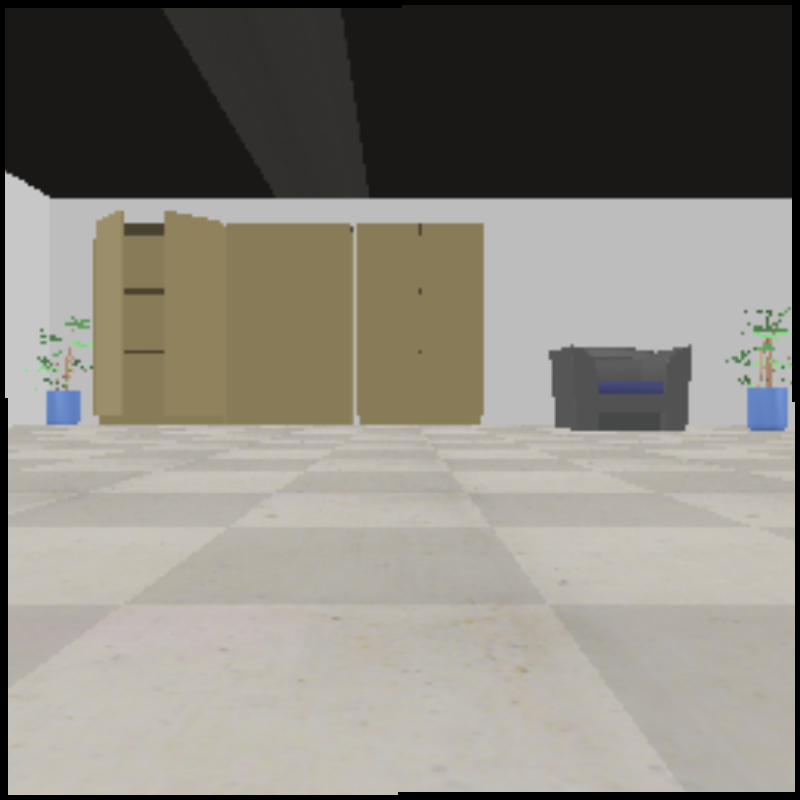

In [5]:
using Images

resolution, image_data = read_vision_sensor(robot)
image = imrotate(colorview(RGB, reshape(Float64.(image_data) / 255, 3, Int64.(resolution)...)), 3π/2)

imresize(image, 800, 800)

In [6]:
position = get_current_position(robot)

orientation = get_current_orientation(robot)

@show(position)

@show(orientation)

nothing

position = Float32[-2.0270295, -0.8250011, 0.13868129]
orientation = Float32[-7.127354e-5, -0.0020270746, -0.00045501077]


In [7]:
p0 = get_current_position(robot)
a0 = get_current_orientation(robot)

@show(p0)
@show(a0)

set_velocity(robot, 0.1, 0)

sleep(5)

stop(robot)

p1 = get_current_position(robot)
a1 = get_current_orientation(robot)

@show(p1)
@show(a1)

nothing

p0 = Float32[-2.0270433, -0.8250009, 0.13867964]
a0 = Float32[-6.605985e-5, -0.0019734066, -0.00045763238]
p1 = Float32[-1.4306669, -0.8254097, 0.13869679]
a1 = Float32[-6.990016e-5, -0.0015412006, -0.0007022915]


In [8]:
reset_simulation()

robot = Robot()

p2 = get_current_position(robot)
a2 = get_current_orientation(robot)

@show(p0)
@show(p1)
@show(p2)

@show(a0)
@show(a1)
@show(a2)

nothing

Simulation stopped...
Simulation started...
Connected to remoteApi server.
Pioneer_p3dx_ultrasonicSensor1 connected.
Pioneer_p3dx_ultrasonicSensor2 connected.
Pioneer_p3dx_ultrasonicSensor3 connected.
Pioneer_p3dx_ultrasonicSensor4 connected.
Pioneer_p3dx_ultrasonicSensor5 connected.
Pioneer_p3dx_ultrasonicSensor6 connected.
Pioneer_p3dx_ultrasonicSensor7 connected.
Pioneer_p3dx_ultrasonicSensor8 connected.
Pioneer_p3dx_ultrasonicSensor9 connected.
Pioneer_p3dx_ultrasonicSensor10 connected.
Pioneer_p3dx_ultrasonicSensor11 connected.
Pioneer_p3dx_ultrasonicSensor12 connected.
Pioneer_p3dx_ultrasonicSensor13 connected.
Pioneer_p3dx_ultrasonicSensor14 connected.
Pioneer_p3dx_ultrasonicSensor15 connected.
Pioneer_p3dx_ultrasonicSensor16 connected.
Vision sensor connected.
Laser connected.
Left motor connected.
Right motor connected.
Robot connected.
p0 = Float32[-2.0270433, -0.8250009, 0.13867964]
p1 = Float32[-1.4306669, -0.8254097, 0.13869679]
p2 = Float32[-2.0253751, -0.8249897, 0.13868